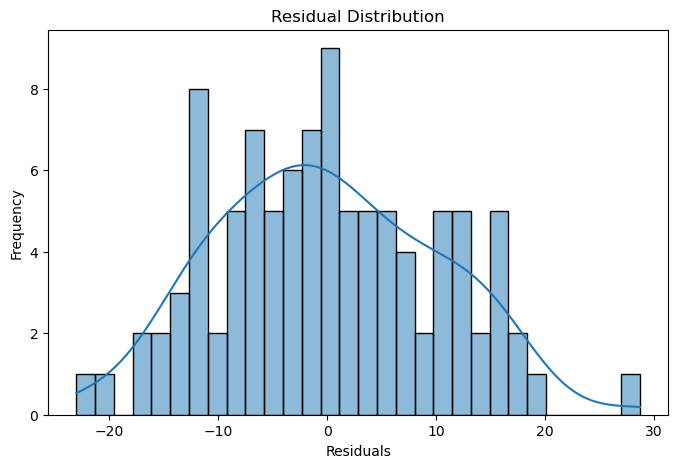

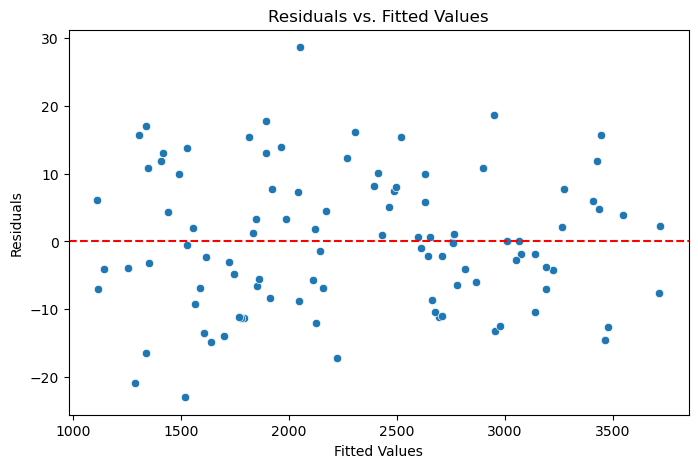

Advanced Model Optimization & Business Impact Summary:
{'Selected Features': ['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth'], 'Model Performance (R-squared)': 0.9997946519351985, 'Number of Outliers Detected': 0, 'Deployment Enhancements': ['Integrate real-time labor and material cost data from suppliers', 'Include weather forecasts to predict potential delays', 'Use geospatial data to adjust costs based on project location', 'Incorporate machine learning models for adaptive cost prediction'], 'Ethical Considerations': {'Overestimation Impact': 'Can lead to budget overruns and loss of project bids', 'Underestimation Impact': 'May cause financial strain, delays, and safety risks', 'Regulatory Compliance': 'Ensure transparency in cost estimation to avoid legal issues'}}


In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from scipy.stats import zscore

file_path = "Civil_Engineering_Regression_Dataset.csv"
df = pd.read_csv(file_path)

X = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y = df['Construction_Cost']

# Feature Selection using Lasso Regression
lasso = LassoCV(cv=5).fit(X, y)
selected_features = X.columns[lasso.coef_ != 0].tolist()

# Fit model with selected features
X_selected = sm.add_constant(df[selected_features])
model = sm.OLS(y, X_selected).fit()

# Residual Analysis
residuals = model.resid
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Residuals vs. Fitted Values Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# Outlier Detection using Z-score
df['Z_Score'] = np.abs(zscore(df['Construction_Cost']))
outliers = df[df['Z_Score'] > 3]  # Threshold for outliers
outlier_count = outliers.shape[0]

# Model Deployment Considerations
deployment_suggestions = [
    "Integrate real-time labor and material cost data from suppliers",
    "Include weather forecasts to predict potential delays",
    "Use geospatial data to adjust costs based on project location",
    "Incorporate machine learning models for adaptive cost prediction"
]

# Ethical Considerations & Business Impact
ethical_considerations = {
    "Overestimation Impact": "Can lead to budget overruns and loss of project bids",
    "Underestimation Impact": "May cause financial strain, delays, and safety risks",
    "Regulatory Compliance": "Ensure transparency in cost estimation to avoid legal issues"
}

# Summary Report
summary = {
    "Selected Features": selected_features,
    "Model Performance (R-squared)": model.rsquared,
    "Number of Outliers Detected": outlier_count,
    "Deployment Enhancements": deployment_suggestions,
    "Ethical Considerations": ethical_considerations
}

print("Advanced Model Optimization & Business Impact Summary:")
print(summary)